<a href="https://colab.research.google.com/github/1804054Miraz/Paper-Publishing/blob/main/ML_apply_in_on_Gamma_Beta_and_KatzFD_Band_with_full_channels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
import numpy as np
import os
import pandas as pd
import statistics as st
import scipy.stats as scst
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import entropy
from scipy.stats import normaltest
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time
from sklearn.ensemble import BaggingClassifier

In [3]:
path = '/content/drive/MyDrive/Dataset/Features/merged_beta_gamma_a_c.csv'
merged_beta_gamma_a_c = pd.read_csv(path)
# merged_beta_gamma_a_c=merged_beta_gamma_a_c.drop(columns=['X_PS','X_PS_2','Y_PS','Y_PS_2','nd_PS', 'nd_PS_2'], axis=False)
merged_beta_gamma_a_c

,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,FC6_PS,...,PO8_PS_2,FCZ_PS_2,POZ_PS_2,OZ_PS_2,P2_PS_2,P1_PS_2,CPZ_PS_2,nd_PS_2,Y_PS_2,label
0,49.125112,75.401561,55.085147,236.773934,24.574587,34.914910,9.395342,15.433209,21.208462,9.854879,...,31.407003,0.639929,3.175360,7.257440,1.171091,1.727645,0.303052,5.626485,6.090333,addicted
1,31.662543,140.818732,107.251892,299.075377,22.347470,53.286704,9.112230,29.795814,17.161432,20.283656,...,31.837468,0.481474,1.360249,3.002968,0.452312,0.873387,0.169722,4.693551,3.472028,addicted
2,33.981550,119.618734,69.705635,404.815675,24.381613,75.511201,9.212180,28.717643,24.864757,23.216713,...,39.507001,0.403271,1.391440,2.908869,0.790318,1.077771,0.227142,6.266331,3.612442,addicted
3,39.844284,101.587017,85.574482,491.630726,27.440661,55.378706,14.178997,42.917834,23.212199,26.417654,...,30.478540,0.450695,1.121842,2.162650,0.753562,0.999099,0.180620,4.211706,6.950914,addicted
4,51.900094,54.809999,113.999959,336.252881,29.900918,53.569130,11.944623,34.313907,17.342946,30.299428,...,55.854653,1.011451,3.663678,5.646425,1.918202,2.340282,0.437771,7.413797,7.107321,addicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7617,56.398217,64.924927,102.732291,88.351802,48.641285,65.179016,36.246569,81.446588,56.383928,53.427282,...,5.024580,0.227139,3.721454,4.377724,1.713244,1.729774,0.453551,5.866098,3.061931,normal
7618,16.385750,19.103398,36.256479,29.794270,14.541851,18.748430,13.719778,28.332358,13.236784,30.672314,...,3.040292,0.398802,3.180998,2.880482,2.019003,1.853624,0.785453,2.408728,3.512361,normal
7619,53.679662,66.320784,87.491928,83.587297,46.040212,55.310880,36.804056,60.752408,44.290746,36.999455,...,2.070562,0.132006,1.298873,1.126842,0.855509,0.550932,0.247462,1.363607,3.663259,normal
7620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,normal


In [4]:
merged_beta_gamma_a_c = merged_beta_gamma_a_c.drop(7620)
merged_beta_gamma_a_c = merged_beta_gamma_a_c.reset_index(drop=True)
merged_beta_gamma_a_c

,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,FC6_PS,...,PO8_PS_2,FCZ_PS_2,POZ_PS_2,OZ_PS_2,P2_PS_2,P1_PS_2,CPZ_PS_2,nd_PS_2,Y_PS_2,label
0,49.125112,75.401561,55.085147,236.773934,24.574587,34.914910,9.395342,15.433209,21.208462,9.854879,...,31.407003,0.639929,3.175360,7.257440,1.171091,1.727645,0.303052,5.626485,6.090333,addicted
1,31.662543,140.818732,107.251892,299.075377,22.347470,53.286704,9.112230,29.795814,17.161432,20.283656,...,31.837468,0.481474,1.360249,3.002968,0.452312,0.873387,0.169722,4.693551,3.472028,addicted
2,33.981550,119.618734,69.705635,404.815675,24.381613,75.511201,9.212180,28.717643,24.864757,23.216713,...,39.507001,0.403271,1.391440,2.908869,0.790318,1.077771,0.227142,6.266331,3.612442,addicted
3,39.844284,101.587017,85.574482,491.630726,27.440661,55.378706,14.178997,42.917834,23.212199,26.417654,...,30.478540,0.450695,1.121842,2.162650,0.753562,0.999099,0.180620,4.211706,6.950914,addicted
4,51.900094,54.809999,113.999959,336.252881,29.900918,53.569130,11.944623,34.313907,17.342946,30.299428,...,55.854653,1.011451,3.663678,5.646425,1.918202,2.340282,0.437771,7.413797,7.107321,addicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616,28.486375,39.398962,72.987461,28.648872,26.222865,31.824731,32.457546,31.413086,28.013546,28.027574,...,2.408939,0.174153,0.867184,1.234990,0.535141,0.633024,0.261792,1.058754,6.116856,normal
7617,56.398217,64.924927,102.732291,88.351802,48.641285,65.179016,36.246569,81.446588,56.383928,53.427282,...,5.024580,0.227139,3.721454,4.377724,1.713244,1.729774,0.453551,5.866098,3.061931,normal
7618,16.385750,19.103398,36.256479,29.794270,14.541851,18.748430,13.719778,28.332358,13.236784,30.672314,...,3.040292,0.398802,3.180998,2.880482,2.019003,1.853624,0.785453,2.408728,3.512361,normal
7619,53.679662,66.320784,87.491928,83.587297,46.040212,55.310880,36.804056,60.752408,44.290746,36.999455,...,2.070562,0.132006,1.298873,1.126842,0.855509,0.550932,0.247462,1.363607,3.663259,normal


In [ ]:
# merged_beta_gamma_a_c = merged_beta_gamma_a_c.replace(0, merged_beta_gamma_a_c.mean(numeric_only=True))

In [ ]:
# Assuming 'new_dataframe' is your DataFrame
X = merged_beta_gamma_a_c.iloc[:, :-1]
y = merged_beta_gamma_a_c.iloc[:, -1]

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Support Vector Machine (SVM)
start_time = time.time()
svm_classifier = make_pipeline(StandardScaler(), SVC())
svm_predictions = cross_val_predict(svm_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
svm_accuracy = accuracy_score(y_encoded, svm_predictions)
svm_precision = precision_score(y_encoded, svm_predictions)
svm_recall = recall_score(y_encoded, svm_predictions)
svm_f1 = f1_score(y_encoded, svm_predictions)
svm_processing_time = time.time() - start_time

print("SVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Processing Time:", svm_processing_time)

# XGBoost
start_time = time.time()
xgb_classifier = XGBClassifier()
xgb_predictions = cross_val_predict(xgb_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
xgb_accuracy = accuracy_score(y_encoded, xgb_predictions)
xgb_precision = precision_score(y_encoded, xgb_predictions)
xgb_recall = recall_score(y_encoded, xgb_predictions)
xgb_f1 = f1_score(y_encoded, xgb_predictions)
xgb_processing_time = time.time() - start_time

print("\nXGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Processing Time:", xgb_processing_time)

# Random Forest
start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
rf_accuracy = accuracy_score(y_encoded, rf_predictions)
rf_precision = precision_score(y_encoded, rf_predictions)
rf_recall = recall_score(y_encoded, rf_predictions)
rf_f1 = f1_score(y_encoded, rf_predictions)
rf_processing_time = time.time() - start_time

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Processing Time:", rf_processing_time)


# Ensemble Subspace of k-Nearest Neighbors
start_time_ensemble_knn = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
ensemble_knn_classifier = BaggingClassifier(base_estimator=knn_classifier, n_estimators=10, random_state=42)

ensemble_knn_scores = cross_val_predict(ensemble_knn_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
ensemble_knn_accuracy = accuracy_score(y_encoded, ensemble_knn_scores)
ensemble_knn_precision = precision_score(y_encoded, ensemble_knn_scores)
ensemble_knn_recall = recall_score(y_encoded, ensemble_knn_scores)
ensemble_knn_f1 = f1_score(y_encoded, ensemble_knn_scores)
ensemble_knn_processing_time = time.time() - start_time_ensemble_knn

print("\nEnsemble Subspace of k-Nearest Neighbors Metrics:")
print("Accuracy:", ensemble_knn_accuracy)
print("Precision:", ensemble_knn_precision)
print("Recall:", ensemble_knn_recall)
print("F1 Score:", ensemble_knn_f1)
print("Processing Time:", ensemble_knn_processing_time)

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert DataFrame to numpy array
X_np = X.values
X_np = X_np.reshape((X_np.shape[0], 1, X_np.shape[1]))

# 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X_np):
    X_train, X_test = X_np[train_idx], X_np[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Create and fit LSTM model
    input_shape = (X_train.shape[1], X_train.shape[2])
    lstm_model = create_lstm_model(input_shape)
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predictions
    y_pred_probs = lstm_model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Evaluate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print("\nLSTM Metrics:")
print("LSTM Model Accuracy:", np.mean(accuracy_scores))
print("LSTM Model Precision:", np.mean(precision_scores))
print("LSTM Model Recall:", np.mean(recall_scores))
print("LSTM Model F1 Score:", np.mean(f1_scores))

SVM Metrics:
Accuracy: 0.887022700433014
Precision: 0.908788466869975
Recall: 0.8603674540682414
F1 Score: 0.8839153296481058
Processing Time: 33.62226629257202

XGBoost Metrics:
Accuracy: 0.9608975200104973
Precision: 0.9572916666666667
Recall: 0.9648293963254593
F1 Score: 0.9610457516339869
Processing Time: 44.04950213432312

Random Forest Metrics:
Accuracy: 0.926912478677339
Precision: 0.9241199478487614
Recall: 0.9301837270341208
F1 Score: 0.927141922825376
Processing Time: 102.24324250221252


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Ensemble Subspace of k-Nearest Neighbors Metrics:
Accuracy: 0.8976512268731137
Precision: 0.8920807453416149
Recall: 0.9047244094488189
F1 Score: 0.8983580922595777
Processing Time: 10.871035099029541
24/24 [==============================] - 0s 3ms/step

LSTM Metrics:
LSTM Model Accuracy: 0.8526434195725534
LSTM Model Precision: 0.8607325727138267
LSTM Model Recall: 0.8462403642097165
LSTM Model F1 Score: 0.8515188549215253


In [5]:
!pip install xgboost lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM
lgb_classifier = lgb.LGBMClassifier()
lgb_predictions = cross_val_predict(lgb_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
lgb_accuracy = accuracy_score(y_encoded, lgb_predictions)
lgb_precision = precision_score(y_encoded, lgb_predictions)
lgb_recall = recall_score(y_encoded, lgb_predictions)
lgb_f1 = f1_score(y_encoded, lgb_predictions)

print("\nLightGBM Metrics:")
print("Accuracy:", lgb_accuracy)
print("Precision:", lgb_precision)
print("Recall:", lgb_recall)
print("F1 Score:", lgb_f1)

from catboost import CatBoostClassifier

# CatBoost
catboost_classifier = CatBoostClassifier(verbose=0)
catboost_predictions = cross_val_predict(catboost_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
catboost_accuracy = accuracy_score(y_encoded, catboost_predictions)
catboost_precision = precision_score(y_encoded, catboost_predictions)
catboost_recall = recall_score(y_encoded, catboost_predictions)
catboost_f1 = f1_score(y_encoded, catboost_predictions)

print("\nCatBoost Metrics:")
print("Accuracy:", catboost_accuracy)
print("Precision:", catboost_precision)
print("Recall:", catboost_recall)
print("F1 Score:", catboost_f1)


[LightGBM] [Info] Number of positive: 3438, number of negative: 3420
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 6858, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501312 -> initscore=0.005249
[LightGBM] [Info] Start training from score 0.005249
[LightGBM] [Info] Number of positive: 3445, number of negative: 3414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 6859, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502260 -> initscore=0.009039
[LightGBM] [Info] Start training from score 0.009039
[LightGBM] [Info] 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Reshape X to fit into CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Build CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
cnn_predictions = cnn_model.predict(X_test_cnn)
cnn_predictions = (cnn_predictions > 0.5).astype(int)

cnn_accuracy = accuracy_score(y_test, cnn_predictions)
cnn_precision = precision_score(y_test, cnn_predictions)
cnn_recall = recall_score(y_test, cnn_predictions)
cnn_f1 = f1_score(y_test, cnn_predictions)

print("\nCNN Metrics:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1 Score:", cnn_f1)


Epoch 1/10
172/172 [==============================] - 8s 39ms/step - loss: 1.1478 - accuracy: 0.6444 - val_loss: 0.5411 - val_accuracy: 0.7557
Epoch 2/10
172/172 [==============================] - 7s 43ms/step - loss: 0.5627 - accuracy: 0.7291 - val_loss: 0.5017 - val_accuracy: 0.7738
Epoch 3/10
172/172 [==============================] - 8s 49ms/step - loss: 0.4694 - accuracy: 0.7798 - val_loss: 0.4309 - val_accuracy: 0.8180
Epoch 4/10
172/172 [==============================] - 7s 43ms/step - loss: 0.4292 - accuracy: 0.8092 - val_loss: 0.3549 - val_accuracy: 0.8410
Epoch 5/10
172/172 [==============================] - 8s 46ms/step - loss: 0.3969 - accuracy: 0.8272 - val_loss: 0.3290 - val_accuracy: 0.8770
Epoch 6/10
172/172 [==============================] - 8s 45ms/step - loss: 0.3563 - accuracy: 0.8496 - val_loss: 0.3459 - val_accuracy: 0.8590
Epoch 7/10
172/172 [==============================] - 7s 42ms/step - loss: 0.3489 - accuracy: 0.8564 - val_loss: 0.3004 - val_accuracy: 0.8820

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Reshape X to fit into LSTM
X_train_lstm = np.expand_dims(X_train, axis=2)
X_test_lstm = np.expand_dims(X_test, axis=2)

# Build Bi-LSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_lstm.shape[1], 1)),
    Bidirectional(LSTM(64)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
bilstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
bilstm_predictions = bilstm_model.predict(X_test_lstm)
bilstm_predictions = (bilstm_predictions > 0.5).astype(int)

bilstm_accuracy = accuracy_score(y_test, bilstm_predictions)
bilstm_precision = precision_score(y_test, bilstm_predictions)
bilstm_recall = recall_score(y_test, bilstm_predictions)
bilstm_f1 = f1_score(y_test, bilstm_predictions)

print("\nBi-LSTM Metrics:")
print("Accuracy:", bilstm_accuracy)
print("Precision:", bilstm_precision)
print("Recall:", bilstm_recall)
print("F1 Score:", bilstm_f1)


Epoch 1/10
172/172 [==============================] - 57s 291ms/step - loss: 0.6637 - accuracy: 0.5899 - val_loss: 0.6304 - val_accuracy: 0.6525
Epoch 2/10
172/172 [==============================] - 50s 290ms/step - loss: 0.6023 - accuracy: 0.6599 - val_loss: 0.5808 - val_accuracy: 0.6852
Epoch 3/10
172/172 [==============================] - 68s 398ms/step - loss: 0.5626 - accuracy: 0.7036 - val_loss: 0.5552 - val_accuracy: 0.7115
Epoch 4/10
172/172 [==============================] - 48s 276ms/step - loss: 0.5331 - accuracy: 0.7155 - val_loss: 0.5094 - val_accuracy: 0.7525
Epoch 5/10
172/172 [==============================] - 49s 285ms/step - loss: 0.5099 - accuracy: 0.7373 - val_loss: 0.5256 - val_accuracy: 0.7393
Epoch 6/10
172/172 [==============================] - 49s 284ms/step - loss: 0.4730 - accuracy: 0.7678 - val_loss: 0.4805 - val_accuracy: 0.7623
Epoch 7/10
172/172 [==============================] - 49s 283ms/step - loss: 0.4552 - accuracy: 0.7807 - val_loss: 0.4870 - val_ac

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define individual models
xgb_classifier = XGBClassifier()
lgb_classifier = lgb.LGBMClassifier()
catboost_classifier = CatBoostClassifier(verbose=0)

# Define voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('xgb', xgb_classifier),
        ('lgb', lgb_classifier),
        ('catboost', catboost_classifier)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted probabilities
)

# Define k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

voting_scores = cross_validate(voting_classifier, X, y_encoded, cv=kf, scoring=scoring)

print("\nVoting Ensemble Metrics:")
print("Accuracy:", np.mean(voting_scores['test_accuracy']))
print("Precision:", np.mean(voting_scores['test_precision']))
print("Recall:", np.mean(voting_scores['test_recall']))
print("F1 Score:", np.mean(voting_scores['test_f1']))


[LightGBM] [Info] Number of positive: 3438, number of negative: 3420
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 6858, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501312 -> initscore=0.005249
[LightGBM] [Info] Start training from score 0.005249
[LightGBM] [Info] Number of positive: 3445, number of negative: 3414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 6859, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502260 -> initscore=0.009039
[LightGBM] [Info] Start training from score 0.009039
[LightGBM] [Info] 

Now, we apply 5-fold cross validation

In [9]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import time

# Assuming 'new_dataframe' is your DataFrame
X = merged_beta_gamma_a_c.iloc[:, :-1]
y = merged_beta_gamma_a_c.iloc[:, -1]

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Support Vector Machine (SVM)
start_time = time.time()
svm_classifier = make_pipeline(StandardScaler(), SVC())
svm_predictions = cross_val_predict(svm_classifier, X, y_encoded, cv=KFold(n_splits=5, shuffle=True, random_state=42))
svm_accuracy = accuracy_score(y_encoded, svm_predictions)
svm_precision = precision_score(y_encoded, svm_predictions)
svm_recall = recall_score(y_encoded, svm_predictions)
svm_f1 = f1_score(y_encoded, svm_predictions)
svm_processing_time = time.time() - start_time

print("SVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Processing Time:", svm_processing_time)

# XGBoost
start_time = time.time()
xgb_classifier = XGBClassifier()
xgb_predictions = cross_val_predict(xgb_classifier, X, y_encoded, cv=KFold(n_splits=5, shuffle=True, random_state=42))
xgb_accuracy = accuracy_score(y_encoded, xgb_predictions)
xgb_precision = precision_score(y_encoded, xgb_predictions)
xgb_recall = recall_score(y_encoded, xgb_predictions)
xgb_f1 = f1_score(y_encoded, xgb_predictions)
xgb_processing_time = time.time() - start_time

print("\nXGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Processing Time:", xgb_processing_time)

# Random Forest
start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_classifier, X, y_encoded, cv=KFold(n_splits=5, shuffle=True, random_state=42))
rf_accuracy = accuracy_score(y_encoded, rf_predictions)
rf_precision = precision_score(y_encoded, rf_predictions)
rf_recall = recall_score(y_encoded, rf_predictions)
rf_f1 = f1_score(y_encoded, rf_predictions)
rf_processing_time = time.time() - start_time

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Processing Time:", rf_processing_time)


# Ensemble Subspace of k-Nearest Neighbors
start_time_ensemble_knn = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
ensemble_knn_classifier = BaggingClassifier(base_estimator=knn_classifier, n_estimators=10, random_state=42)

ensemble_knn_scores = cross_val_predict(ensemble_knn_classifier, X, y_encoded, cv=KFold(n_splits=5, shuffle=True, random_state=42))
ensemble_knn_accuracy = accuracy_score(y_encoded, ensemble_knn_scores)
ensemble_knn_precision = precision_score(y_encoded, ensemble_knn_scores)
ensemble_knn_recall = recall_score(y_encoded, ensemble_knn_scores)
ensemble_knn_f1 = f1_score(y_encoded, ensemble_knn_scores)
ensemble_knn_processing_time = time.time() - start_time_ensemble_knn

print("\nEnsemble Subspace of k-Nearest Neighbors Metrics:")
print("Accuracy:", ensemble_knn_accuracy)
print("Precision:", ensemble_knn_precision)
print("Recall:", ensemble_knn_recall)
print("F1 Score:", ensemble_knn_f1)
print("Processing Time:", ensemble_knn_processing_time)

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert DataFrame to numpy array
X_np = X.values
X_np = X_np.reshape((X_np.shape[0], 1, X_np.shape[1]))

# 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X_np):
    X_train, X_test = X_np[train_idx], X_np[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Create and fit LSTM model
    input_shape = (X_train.shape[1], X_train.shape[2])
    lstm_model = create_lstm_model(input_shape)
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predictions
    y_pred_probs = lstm_model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Evaluate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print("\nLSTM Metrics:")
print("LSTM Model Accuracy:", np.mean(accuracy_scores))
print("LSTM Model Precision:", np.mean(precision_scores))
print("LSTM Model Recall:", np.mean(recall_scores))
print("LSTM Model F1 Score:", np.mean(f1_scores))


SVM Metrics:
Accuracy: 0.8820364781524734
Precision: 0.903073940736638
Recall: 0.8559055118110236
F1 Score: 0.8788572968602614
Processing Time: 16.040318489074707

XGBoost Metrics:
Accuracy: 0.9587980579976381
Precision: 0.9575916230366492
Recall: 0.9601049868766404
F1 Score: 0.9588466579292267
Processing Time: 17.92143487930298

Random Forest Metrics:
Accuracy: 0.920745309014565
Precision: 0.9178832116788321
Recall: 0.9241469816272966
F1 Score: 0.9210044467695527
Processing Time: 39.59636378288269


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Ensemble Subspace of k-Nearest Neighbors Metrics:
Accuracy: 0.9025062327778507
Precision: 0.8963556474541226
Recall: 0.9102362204724409
F1 Score: 0.9032426097148066
Processing Time: 6.354982137680054
48/48 [==============================] - 0s 2ms/step

LSTM Metrics:
LSTM Model Accuracy: 0.8518568908394647
LSTM Model Precision: 0.8833299022548335
LSTM Model Recall: 0.8111460884214627
LSTM Model F1 Score: 0.845442412402717


In [7]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Assuming 'new_dataframe' is your DataFrame
X = merged_beta_gamma_a_c.iloc[:, :-1]
y = merged_beta_gamma_a_c.iloc[:, -1]

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# LightGBM
lgb_classifier = lgb.LGBMClassifier()
lgb_predictions = cross_val_predict(lgb_classifier, X, y_encoded, cv=KFold(n_splits=5, shuffle=True, random_state=42))
lgb_accuracy = accuracy_score(y_encoded, lgb_predictions)
lgb_precision = precision_score(y_encoded, lgb_predictions)
lgb_recall = recall_score(y_encoded, lgb_predictions)
lgb_f1 = f1_score(y_encoded, lgb_predictions)

print("\nLightGBM Metrics:")
print("Accuracy:", lgb_accuracy)
print("Precision:", lgb_precision)
print("Recall:", lgb_recall)
print("F1 Score:", lgb_f1)

from catboost import CatBoostClassifier

# CatBoost
catboost_classifier = CatBoostClassifier(verbose=0)
catboost_predictions = cross_val_predict(catboost_classifier, X, y_encoded, cv=KFold(n_splits=5, shuffle=True, random_state=42))
catboost_accuracy = accuracy_score(y_encoded, catboost_predictions)
catboost_precision = precision_score(y_encoded, catboost_predictions)
catboost_recall = recall_score(y_encoded, catboost_predictions)
catboost_f1 = f1_score(y_encoded, catboost_predictions)

print("\nCatBoost Metrics:")
print("Accuracy:", catboost_accuracy)
print("Precision:", catboost_precision)
print("Recall:", catboost_recall)
print("F1 Score:", catboost_f1)


[LightGBM] [Info] Number of positive: 3073, number of negative: 3023
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 6096, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504101 -> initscore=0.016405
[LightGBM] [Info] Start training from score 0.016405
[LightGBM] [Info] Number of positive: 3030, number of negative: 3067
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 6097, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496966 -> initscore=-0.012137
[Light

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define individual models
xgb_classifier = XGBClassifier()
lgb_classifier = lgb.LGBMClassifier()
catboost_classifier = CatBoostClassifier(verbose=0)

# Define voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('xgb', xgb_classifier),
        ('lgb', lgb_classifier),
        ('catboost', catboost_classifier)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted probabilities
)

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

voting_scores = cross_validate(voting_classifier, X, y_encoded, cv=kf, scoring=scoring)

print("\nVoting Ensemble Metrics:")
print("Accuracy:", np.mean(voting_scores['test_accuracy']))
print("Precision:", np.mean(voting_scores['test_precision']))
print("Recall:", np.mean(voting_scores['test_recall']))
print("F1 Score:", np.mean(voting_scores['test_f1']))


[LightGBM] [Info] Number of positive: 3073, number of negative: 3023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 6096, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504101 -> initscore=0.016405
[LightGBM] [Info] Start training from score 0.016405
[LightGBM] [Info] Number of positive: 3030, number of negative: 3067
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 6097, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496966 -> initscore=-0.012137
[LightGBM] [Info] Start training from score -0.012137
[LightGBM] [Info


XGBoost Metrics:
Accuracy: 0.9607714510627132
Precision: 0.9580073030777256
Recall: 0.9637890317501968
F1 Score: 0.9608894702419883
Processing Time: 44.23505616188049

Confusion Matrix:
[[3650  161]
 [ 138 3673]]


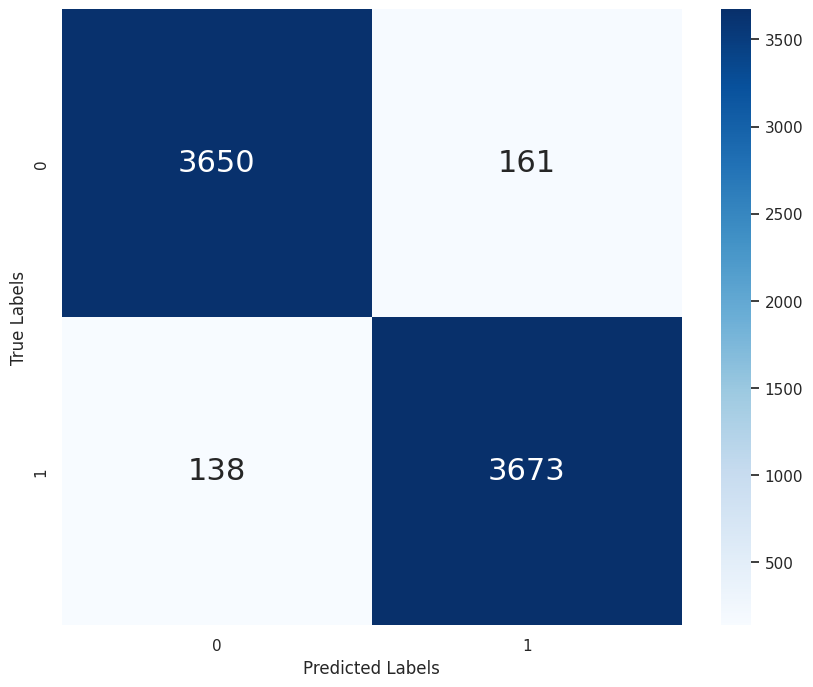

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_dataframe' is your DataFrame
X = merged_beta_gamma_a_c.iloc[:, :-1]
y = merged_beta_gamma_a_c.iloc[:, -1]

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# XGBoost
start_time = time.time()
xgb_classifier = XGBClassifier()
xgb_predictions = cross_val_predict(xgb_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
xgb_accuracy = accuracy_score(y_encoded, xgb_predictions)
xgb_precision = precision_score(y_encoded, xgb_predictions)
xgb_recall = recall_score(y_encoded, xgb_predictions)
xgb_f1 = f1_score(y_encoded, xgb_predictions)
xgb_processing_time = time.time() - start_time

# Confusion Matrix
xgb_confusion_matrix = confusion_matrix(y_encoded, xgb_predictions)

print("\nXGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Processing Time:", xgb_processing_time)
print("\nConfusion Matrix:")
print(xgb_confusion_matrix)

# Create a heatmap of the confusion matrix with a diverging color palette
plt.figure(figsize=(10, 8))
sns.set(font_scale=1)  # Adjust font size
sns.heatmap(xgb_confusion_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 22})

# plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
path = '/content/drive/MyDrive/Dataset/Features/Katz_Fd_Features_a_c.csv'
Katz_Fd_Features_a_c = pd.read_csv(path)

path = '/content/drive/MyDrive/Dataset/Features/merged_beta_gamma_a_c.csv'
merged_beta_gamma_a_c = pd.read_csv(path)
# merged_beta_gamma_a_c=merged_beta_gamma_a_c.drop(columns=['X_PS','X_PS_2','Y_PS','Y_PS_2','nd_PS', 'nd_PS_2'], axis=False)


In [ ]:
merged_beta_gamma_katz_a_c = pd.concat([merged_beta_gamma_a_c,Katz_Fd_Features_a_c], axis=1)
merged_beta_gamma_katz_a_c.drop('label', axis=1, inplace=True)
merged_beta_gamma_katz_a_c['label']='normal'
merged_beta_gamma_katz_a_c.loc[0:3810, 'label'] = 'addicted'
merged_beta_gamma_katz_a_c

,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,FC6_PS,...,FCZ_PS_2,POZ_PS_2,OZ_PS_2,P2_PS_2,P1_PS_2,CPZ_PS_2,nd_PS_2,Y_PS_2,FP2,label
0,49.125112,75.401561,55.085147,236.773934,24.574587,34.914910,9.395342,15.433209,21.208462,9.854879,...,0.639929,3.175360,7.257440,1.171091,1.727645,0.303052,5.626485,6.090333,1.655864,addicted
1,31.662543,140.818732,107.251892,299.075377,22.347470,53.286704,9.112230,29.795814,17.161432,20.283656,...,0.481474,1.360249,3.002968,0.452312,0.873387,0.169722,4.693551,3.472028,1.367933,addicted
2,33.981550,119.618734,69.705635,404.815675,24.381613,75.511201,9.212180,28.717643,24.864757,23.216713,...,0.403271,1.391440,2.908869,0.790318,1.077771,0.227142,6.266331,3.612442,1.584968,addicted
3,39.844284,101.587017,85.574482,491.630726,27.440661,55.378706,14.178997,42.917834,23.212199,26.417654,...,0.450695,1.121842,2.162650,0.753562,0.999099,0.180620,4.211706,6.950914,1.282758,addicted
4,51.900094,54.809999,113.999959,336.252881,29.900918,53.569130,11.944623,34.313907,17.342946,30.299428,...,1.011451,3.663678,5.646425,1.918202,2.340282,0.437771,7.413797,7.107321,1.461674,addicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7617,56.398217,64.924927,102.732291,88.351802,48.641285,65.179016,36.246569,81.446588,56.383928,53.427282,...,0.227139,3.721454,4.377724,1.713244,1.729774,0.453551,5.866098,3.061931,1.538744,normal
7618,16.385750,19.103398,36.256479,29.794270,14.541851,18.748430,13.719778,28.332358,13.236784,30.672314,...,0.398802,3.180998,2.880482,2.019003,1.853624,0.785453,2.408728,3.512361,1.716444,normal
7619,53.679662,66.320784,87.491928,83.587297,46.040212,55.310880,36.804056,60.752408,44.290746,36.999455,...,0.132006,1.298873,1.126842,0.855509,0.550932,0.247462,1.363607,3.663259,1.556286,normal
7620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,normal


In [ ]:
# merged_beta_gamma_katz_a_c = merged_beta_gamma_katz_a_c.replace(0, merged_beta_gamma_katz_a_c.mean())
# merged_beta_gamma_katz_a_c = merged_beta_gamma_katz_a_c.replace(0, merged_beta_gamma_katz_a_c.mean(numeric_only=True))
merged_beta_gamma_katz_a_c = merged_beta_gamma_katz_a_c.drop(7620)
merged_beta_gamma_katz_a_c = merged_beta_gamma_katz_a_c.reset_index(drop=True)
merged_beta_gamma_katz_a_c

,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,FC6_PS,...,FCZ_PS_2,POZ_PS_2,OZ_PS_2,P2_PS_2,P1_PS_2,CPZ_PS_2,nd_PS_2,Y_PS_2,FP2,label
0,49.125112,75.401561,55.085147,236.773934,24.574587,34.914910,9.395342,15.433209,21.208462,9.854879,...,0.639929,3.175360,7.257440,1.171091,1.727645,0.303052,5.626485,6.090333,1.655864,addicted
1,31.662543,140.818732,107.251892,299.075377,22.347470,53.286704,9.112230,29.795814,17.161432,20.283656,...,0.481474,1.360249,3.002968,0.452312,0.873387,0.169722,4.693551,3.472028,1.367933,addicted
2,33.981550,119.618734,69.705635,404.815675,24.381613,75.511201,9.212180,28.717643,24.864757,23.216713,...,0.403271,1.391440,2.908869,0.790318,1.077771,0.227142,6.266331,3.612442,1.584968,addicted
3,39.844284,101.587017,85.574482,491.630726,27.440661,55.378706,14.178997,42.917834,23.212199,26.417654,...,0.450695,1.121842,2.162650,0.753562,0.999099,0.180620,4.211706,6.950914,1.282758,addicted
4,51.900094,54.809999,113.999959,336.252881,29.900918,53.569130,11.944623,34.313907,17.342946,30.299428,...,1.011451,3.663678,5.646425,1.918202,2.340282,0.437771,7.413797,7.107321,1.461674,addicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616,28.486375,39.398962,72.987461,28.648872,26.222865,31.824731,32.457546,31.413086,28.013546,28.027574,...,0.174153,0.867184,1.234990,0.535141,0.633024,0.261792,1.058754,6.116856,1.819097,normal
7617,56.398217,64.924927,102.732291,88.351802,48.641285,65.179016,36.246569,81.446588,56.383928,53.427282,...,0.227139,3.721454,4.377724,1.713244,1.729774,0.453551,5.866098,3.061931,1.538744,normal
7618,16.385750,19.103398,36.256479,29.794270,14.541851,18.748430,13.719778,28.332358,13.236784,30.672314,...,0.398802,3.180998,2.880482,2.019003,1.853624,0.785453,2.408728,3.512361,1.716444,normal
7619,53.679662,66.320784,87.491928,83.587297,46.040212,55.310880,36.804056,60.752408,44.290746,36.999455,...,0.132006,1.298873,1.126842,0.855509,0.550932,0.247462,1.363607,3.663259,1.556286,normal


In [ ]:
# Assuming 'new_dataframe' is your DataFrame
X = merged_beta_gamma_katz_a_c.iloc[:, :-1]
y = merged_beta_gamma_katz_a_c.iloc[:, -1]

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Support Vector Machine (SVM)
start_time = time.time()
svm_classifier = make_pipeline(StandardScaler(), SVC())
svm_predictions = cross_val_predict(svm_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
svm_accuracy = accuracy_score(y_encoded, svm_predictions)
svm_precision = precision_score(y_encoded, svm_predictions)
svm_recall = recall_score(y_encoded, svm_predictions)
svm_f1 = f1_score(y_encoded, svm_predictions)
svm_processing_time = time.time() - start_time

print("SVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Processing Time:", svm_processing_time)

# XGBoost
start_time = time.time()
xgb_classifier = XGBClassifier()
xgb_predictions = cross_val_predict(xgb_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
xgb_accuracy = accuracy_score(y_encoded, xgb_predictions)
xgb_precision = precision_score(y_encoded, xgb_predictions)
xgb_recall = recall_score(y_encoded, xgb_predictions)
xgb_f1 = f1_score(y_encoded, xgb_predictions)
xgb_processing_time = time.time() - start_time

print("\nXGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Processing Time:", xgb_processing_time)

# Random Forest
start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
rf_accuracy = accuracy_score(y_encoded, rf_predictions)
rf_precision = precision_score(y_encoded, rf_predictions)
rf_recall = recall_score(y_encoded, rf_predictions)
rf_f1 = f1_score(y_encoded, rf_predictions)
rf_processing_time = time.time() - start_time

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Processing Time:", rf_processing_time)


# Ensemble Subspace of k-Nearest Neighbors
start_time_ensemble_knn = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
ensemble_knn_classifier = BaggingClassifier(base_estimator=knn_classifier, n_estimators=10, random_state=42)

ensemble_knn_scores = cross_val_predict(ensemble_knn_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
ensemble_knn_accuracy = accuracy_score(y_encoded, ensemble_knn_scores)
ensemble_knn_precision = precision_score(y_encoded, ensemble_knn_scores)
ensemble_knn_recall = recall_score(y_encoded, ensemble_knn_scores)
ensemble_knn_f1 = f1_score(y_encoded, ensemble_knn_scores)
ensemble_knn_processing_time = time.time() - start_time_ensemble_knn

print("\nEnsemble Subspace of k-Nearest Neighbors Metrics:")
print("Accuracy:", ensemble_knn_accuracy)
print("Precision:", ensemble_knn_precision)
print("Recall:", ensemble_knn_recall)
print("F1 Score:", ensemble_knn_f1)
print("Processing Time:", ensemble_knn_processing_time)

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert DataFrame to numpy array
X_np = X.values
X_np = X_np.reshape((X_np.shape[0], 1, X_np.shape[1]))

# 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X_np):
    X_train, X_test = X_np[train_idx], X_np[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Create and fit LSTM model
    input_shape = (X_train.shape[1], X_train.shape[2])
    lstm_model = create_lstm_model(input_shape)
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predictions
    y_pred_probs = lstm_model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Evaluate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print("\nLSTM Metrics:")
print("LSTM Model Accuracy:", np.mean(accuracy_scores))
print("LSTM Model Precision:", np.mean(precision_scores))
print("LSTM Model Recall:", np.mean(recall_scores))
print("LSTM Model F1 Score:", np.mean(f1_scores))

SVM Metrics:
Accuracy: 0.8874163495604251
Precision: 0.9079601990049752
Recall: 0.8622047244094488
F1 Score: 0.884491114701131
Processing Time: 42.32944369316101

XGBoost Metrics:
Accuracy: 0.9598477890040678
Precision: 0.9553014553014553
Recall: 0.9648293963254593
F1 Score: 0.9600417863671975
Processing Time: 44.08563446998596

Random Forest Metrics:
Accuracy: 0.9254690985434982
Precision: 0.9221354166666667
Recall: 0.9293963254593176
F1 Score: 0.9257516339869281
Processing Time: 93.85324311256409


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Ensemble Subspace of k-Nearest Neighbors Metrics:
Accuracy: 0.8975200104973101
Precision: 0.8920528086979032
Recall: 0.9044619422572179
F1 Score: 0.8982145184412876
Processing Time: 11.77825665473938
24/24 [==============================] - 0s 2ms/step

LSTM Metrics:
LSTM Model Accuracy: 0.8372904648386841
LSTM Model Precision: 0.8743427561952484
LSTM Model Recall: 0.7903950702327056
LSTM Model F1 Score: 0.8292798950548732


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM
lgb_classifier = lgb.LGBMClassifier()
lgb_predictions = cross_val_predict(lgb_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
lgb_accuracy = accuracy_score(y_encoded, lgb_predictions)
lgb_precision = precision_score(y_encoded, lgb_predictions)
lgb_recall = recall_score(y_encoded, lgb_predictions)
lgb_f1 = f1_score(y_encoded, lgb_predictions)

print("\nLightGBM Metrics:")
print("Accuracy:", lgb_accuracy)
print("Precision:", lgb_precision)
print("Recall:", lgb_recall)
print("F1 Score:", lgb_f1)

from catboost import CatBoostClassifier

# CatBoost
catboost_classifier = CatBoostClassifier(verbose=0)
catboost_predictions = cross_val_predict(catboost_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
catboost_accuracy = accuracy_score(y_encoded, catboost_predictions)
catboost_precision = precision_score(y_encoded, catboost_predictions)
catboost_recall = recall_score(y_encoded, catboost_predictions)
catboost_f1 = f1_score(y_encoded, catboost_predictions)

print("\nCatBoost Metrics:")
print("Accuracy:", catboost_accuracy)
print("Precision:", catboost_precision)
print("Recall:", catboost_recall)
print("F1 Score:", catboost_f1)


[LightGBM] [Info] Number of positive: 3438, number of negative: 3420
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32895
[LightGBM] [Info] Number of data points in the train set: 6858, number of used features: 129
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501312 -> initscore=0.005249
[LightGBM] [Info] Start training from score 0.005249
[LightGBM] [Info] Number of positive: 3445, number of negative: 3414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32895
[LightGBM] [Info] Number of data points in the train set: 6859, number of used features: 129
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502260 -> initscore=0.009039
[LightGBM] [Info] Start training from score 0.009039
[LightGBM] [Info] 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Reshape X to fit into CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Build CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
cnn_predictions = cnn_model.predict(X_test_cnn)
cnn_predictions = (cnn_predictions > 0.5).astype(int)

cnn_accuracy = accuracy_score(y_test, cnn_predictions)
cnn_precision = precision_score(y_test, cnn_predictions)
cnn_recall = recall_score(y_test, cnn_predictions)
cnn_f1 = f1_score(y_test, cnn_predictions)

print("\nCNN Metrics:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1 Score:", cnn_f1)


Epoch 1/10
172/172 [==============================] - 6s 26ms/step - loss: 1.0616 - accuracy: 0.6360 - val_loss: 0.5737 - val_accuracy: 0.7213
Epoch 2/10
172/172 [==============================] - 4s 24ms/step - loss: 0.5287 - accuracy: 0.7444 - val_loss: 0.4642 - val_accuracy: 0.7820
Epoch 3/10
172/172 [==============================] - 7s 39ms/step - loss: 0.4990 - accuracy: 0.7751 - val_loss: 0.4203 - val_accuracy: 0.8230
Epoch 4/10
172/172 [==============================] - 4s 24ms/step - loss: 0.4246 - accuracy: 0.8093 - val_loss: 0.3675 - val_accuracy: 0.8443
Epoch 5/10
172/172 [==============================] - 4s 24ms/step - loss: 0.3733 - accuracy: 0.8369 - val_loss: 0.3092 - val_accuracy: 0.8754
Epoch 6/10
172/172 [==============================] - 6s 33ms/step - loss: 0.3391 - accuracy: 0.8555 - val_loss: 0.2805 - val_accuracy: 0.8885
Epoch 7/10
172/172 [==============================] - 5s 30ms/step - loss: 0.3079 - accuracy: 0.8729 - val_loss: 0.2483 - val_accuracy: 0.9049

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder



# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for CNN input (samples, time steps, features)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Convert target variable to categorical
y_categorical = to_categorical(y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("\nCNN Model Metrics:")
print(f"Accuracy: {scores[1]}")


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define individual models
xgb_classifier = XGBClassifier()
lgb_classifier = lgb.LGBMClassifier()
catboost_classifier = CatBoostClassifier(verbose=0)

# Define voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('xgb', xgb_classifier),
        ('lgb', lgb_classifier),
        ('catboost', catboost_classifier)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted probabilities
)

# Define k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

voting_scores = cross_validate(voting_classifier, X, y_encoded, cv=kf, scoring=scoring)

print("\nVoting Ensemble Metrics:")
print("Accuracy:", np.mean(voting_scores['test_accuracy']))
print("Precision:", np.mean(voting_scores['test_precision']))
print("Recall:", np.mean(voting_scores['test_recall']))
print("F1 Score:", np.mean(voting_scores['test_f1']))


[LightGBM] [Info] Number of positive: 3438, number of negative: 3420
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32895
[LightGBM] [Info] Number of data points in the train set: 6858, number of used features: 129
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501312 -> initscore=0.005249
[LightGBM] [Info] Start training from score 0.005249
[LightGBM] [Info] Number of positive: 3445, number of negative: 3414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32895
[LightGBM] [Info] Number of data points in the train set: 6859, number of used features: 129
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502260 -> initscore=0.009039
[LightGBM] [Info] Start training from score 0.009039
[LightGBM] [Info] 

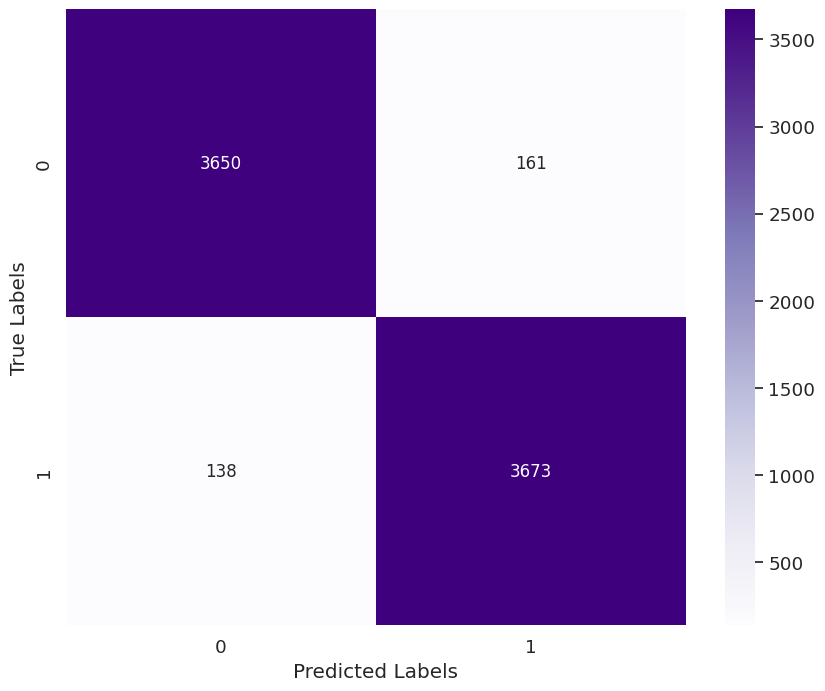

In [ ]:
# Create a heatmap of the confusion matrix with a diverging color palette
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(xgb_confusion_matrix, annot=True, cmap="Purples", fmt="d", annot_kws={"size": 12})

# plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

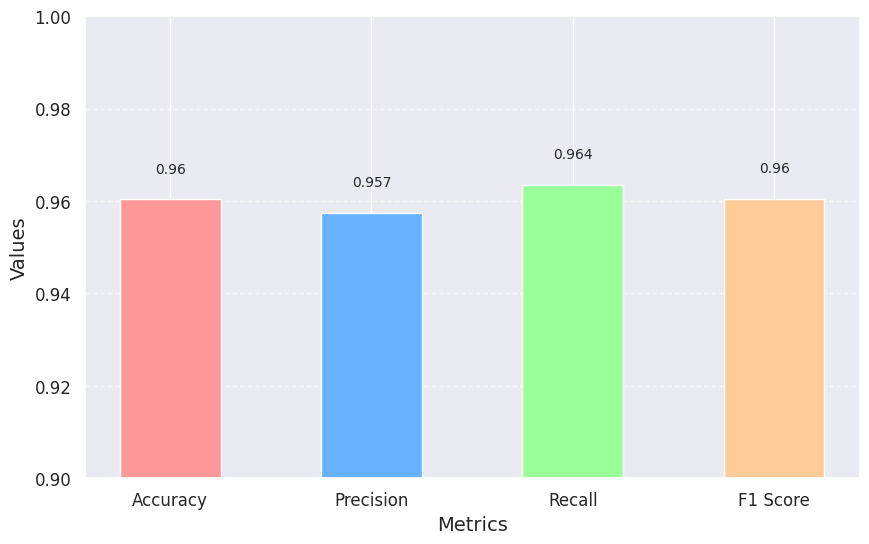

In [ ]:
import matplotlib.pyplot as plt

# XGBoost metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.9603726545072825, 0.9574856546687532, 0.9635170603674541, 0.9604918890633177]

# Define beautiful colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=colors, width=0.5)

# Annotating the bars with metric values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Adding titles and labels
# plt.title('XGBoost Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Displaying the plot
plt.ylim(0.9, 1)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


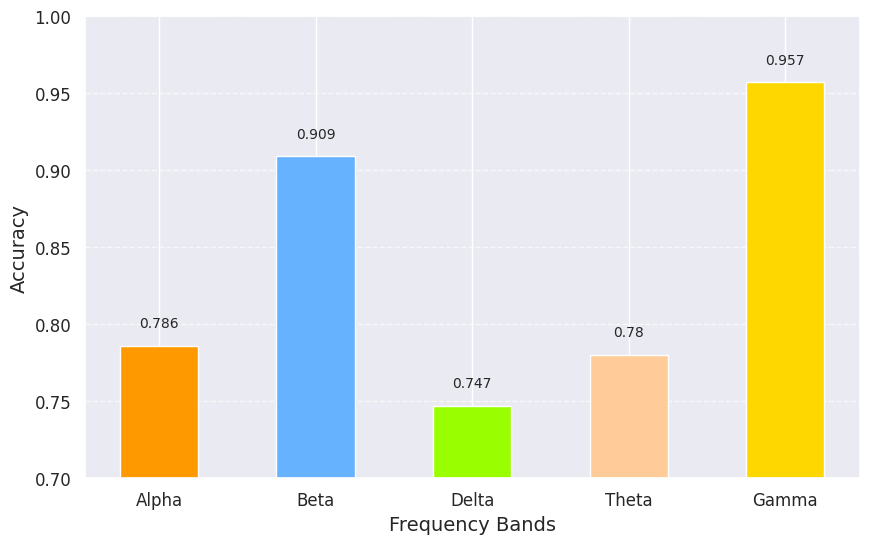

In [ ]:
import matplotlib.pyplot as plt

# Frequency bands and their corresponding accuracy values
bands = ['Alpha', 'Beta', 'Delta', 'Theta', 'Gamma']
accuracy_values = [0.786, 0.909, 0.747, 0.780, 0.957]

# Define colors for each frequency band
colors = ['#FF9900', '#66B2FF', '#99FF00', '#FFCC99', '#FFD700']

# Plotting the accuracy values
plt.figure(figsize=(10, 6))
bars = plt.bar(bands, accuracy_values, color=colors, width=0.5)

# Annotating the bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Adding titles and labels
# plt.title('XGBoost Accuracy', fontsize=16)
plt.xlabel('Frequency Bands', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Displaying the plot
plt.ylim(0.7, 1)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


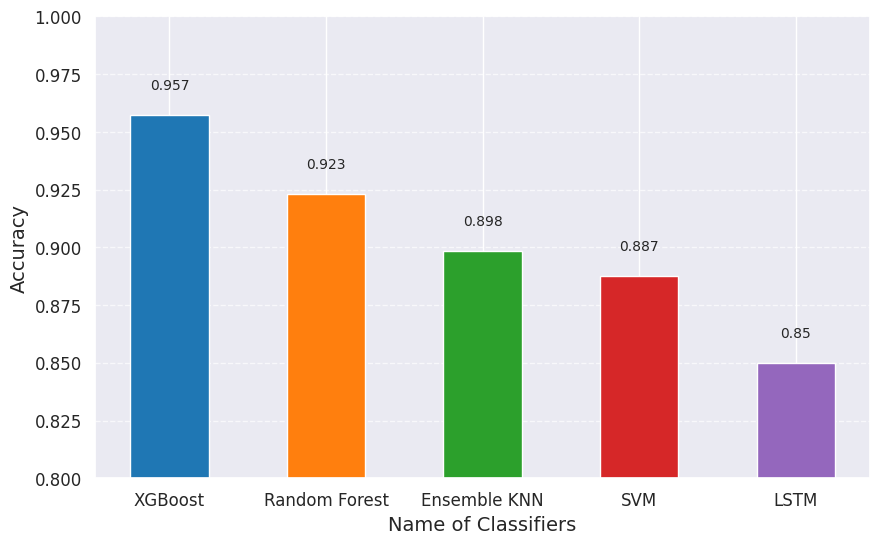

In [ ]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['XGBoost', 'Random Forest', 'Ensemble KNN', 'SVM', 'LSTM']

# Accuracy values for each classifier
accuracy_values = [0.9572234614879938, 0.9231072037790317, 0.898438525127936, 0.8874163495604251, 0.8498888900355347]

# Define colors for each classifier
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Using predefined colors from matplotlib

# Plotting the accuracy values
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracy_values, color=colors, width=0.5)

# Annotating the bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Adding titles and labels
plt.xlabel('Name of Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
# plt.title('Accuracy Comparison of Different Classifiers', fontsize=16)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Displaying the plot
plt.ylim(0.8, 1)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


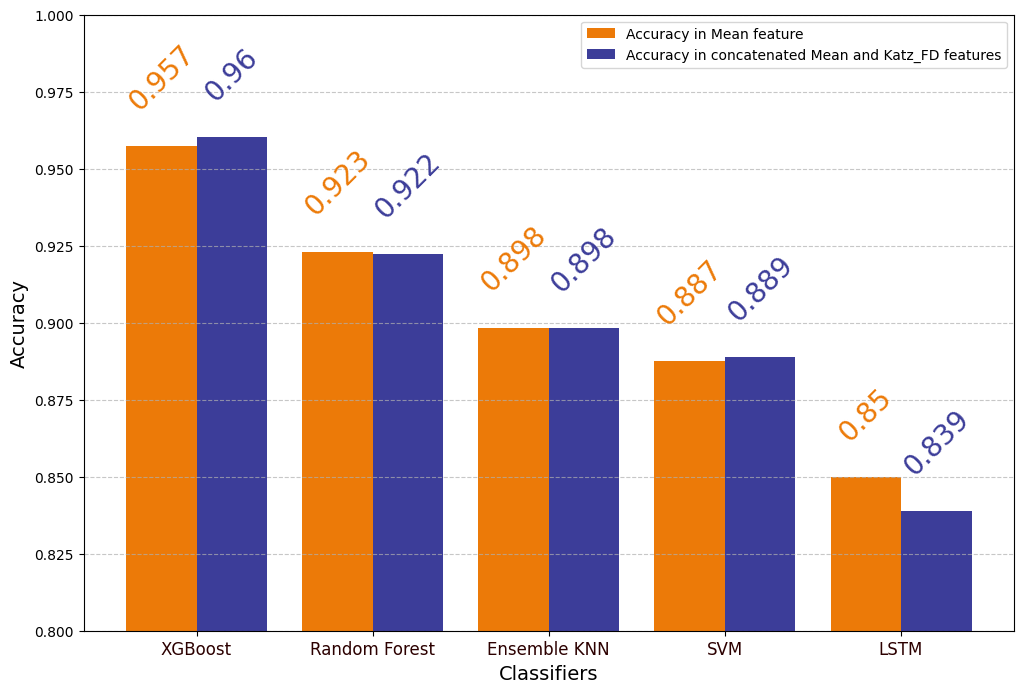

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classifiers = ['XGBoost', 'Random Forest', 'Ensemble KNN', 'SVM', 'LSTM']
accuracy_values1 = [0.9572234614879938, 0.9231072037790317, 0.898438525127936, 0.8874163495604251, 0.8498888900355347]
accuracy_values2 = [0.9603726545072825, 0.9223199055242094, 0.8983073087521323, 0.8887285133184621, 0.8388626880355552]

# Set width of bar
barWidth = 0.40

# Set position of bar on X axis
r1 = np.arange(len(accuracy_values1))
r2 = [x + barWidth for x in r1]

# Plotting the bars
plt.figure(figsize=(12, 8))
plt.bar(r1, accuracy_values1, color='#EC7A08', width=barWidth,  label='Accuracy in Mean feature')
plt.bar(r2, accuracy_values2, color='#3C3D99', width=barWidth,  label='Accuracy in concatenated Mean and Katz_FD features')

# Adding labels
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks([r + barWidth/2 for r in range(len(accuracy_values1))], classifiers, rotation=0, ha='center', fontsize=12, color='#2C0000')
# plt.title('Comparative Analysis of Accuracy Values', fontsize=16)
plt.ylim(0.8, 1)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating bars with accuracy values
for i, (value1, value2) in enumerate(zip(accuracy_values1, accuracy_values2)):
    plt.text(r1[i], value1 + 0.01, round(value1, 3),rotation=45, ha='center', va='bottom', fontsize=20, color='#EC7A08')
    plt.text(r2[i], value2 + 0.01, round(value2, 3), rotation=45,ha='center', va='bottom', fontsize=20, color='#3C3D99')

# Adding legend
plt.legend()

# Show plot
plt.show()


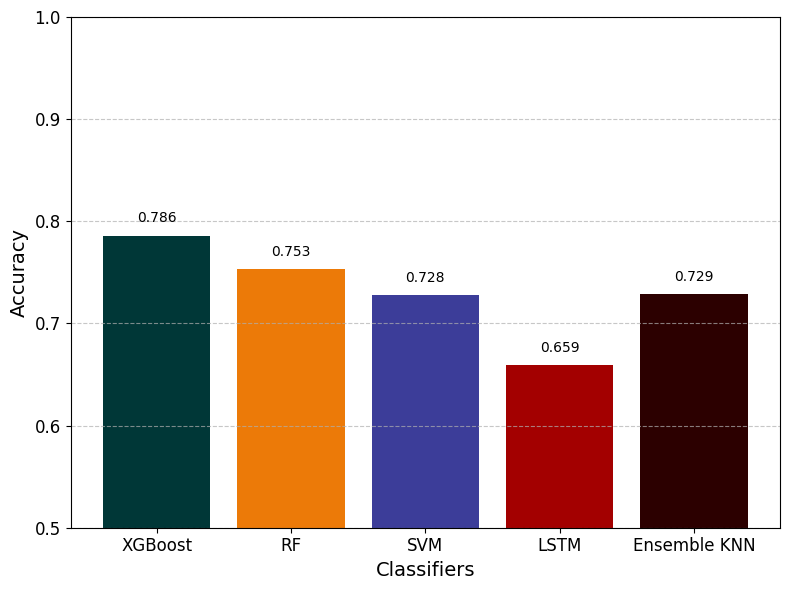

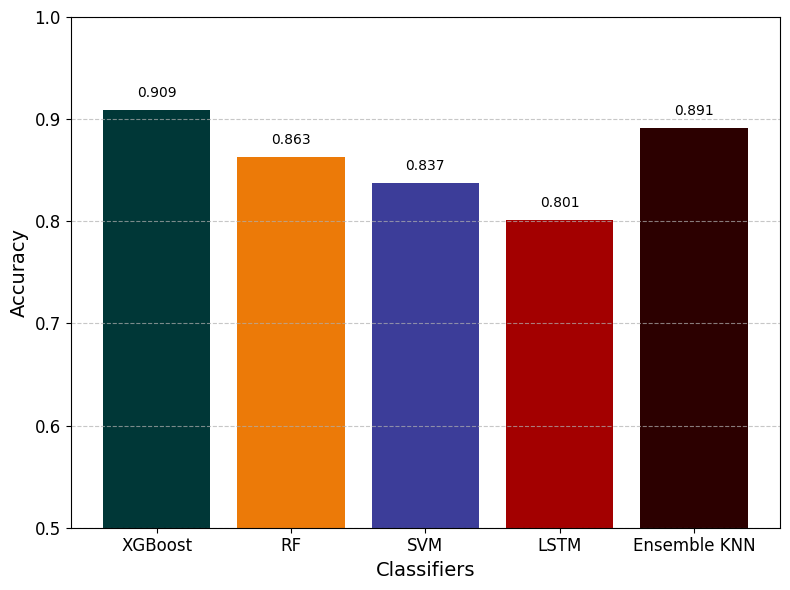

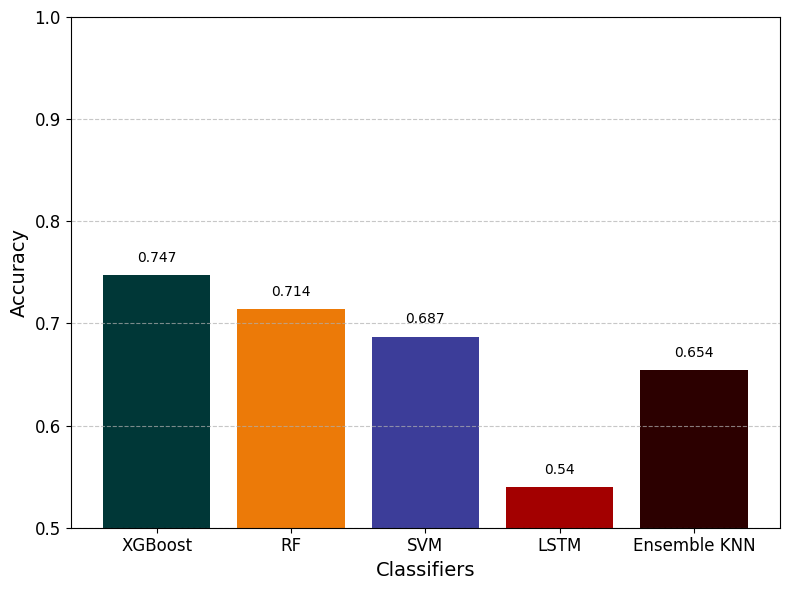

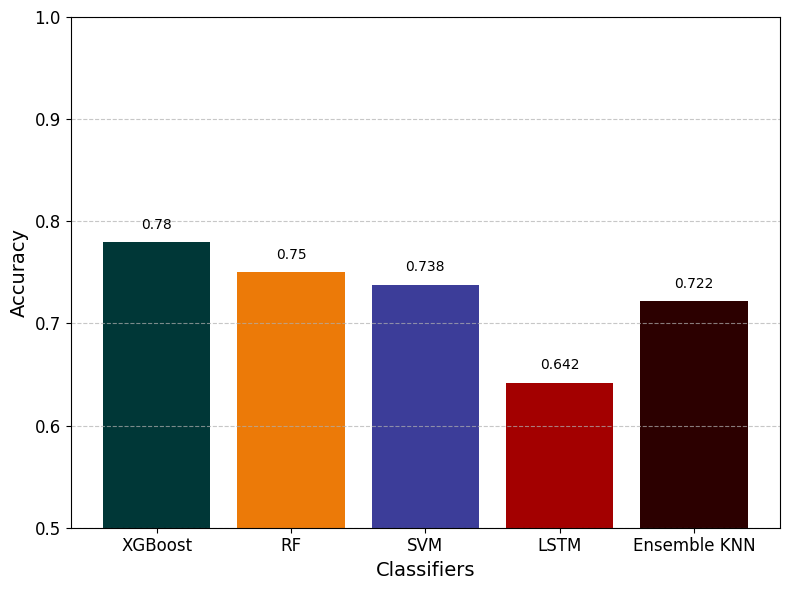

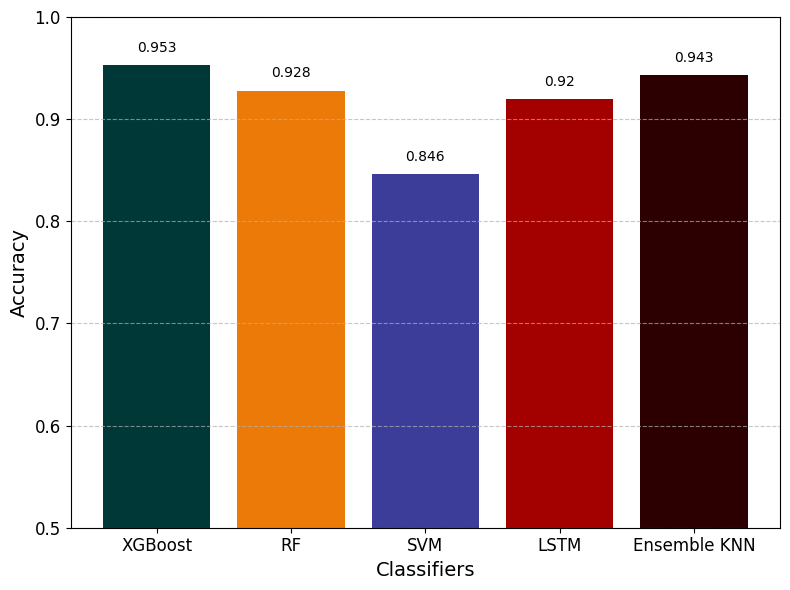

In [ ]:
import matplotlib.pyplot as plt

# Data
bands = ['Alpha', 'Beta', 'Delta', 'Theta', 'Gamma']
classifiers = ['XGBoost', 'RF', 'SVM', 'LSTM', 'Ensemble KNN']
accuracy_data = [
    [0.786, 0.753, 0.728, 0.659, 0.729],
    [0.909, 0.863, 0.837, 0.801, 0.891],
    [0.747, 0.714, 0.687, 0.540, 0.654],
    [0.780, 0.750, 0.738, 0.642, 0.722],
    [0.953, 0.928, 0.846, 0.920, 0.943]
]

# Define another set of contrasting colors for each classifier
colors = ['#003737', '#EC7A08', '#3C3D99', '#A30000', '#2C0000']

# Plotting separate bar charts for each band
for i, band in enumerate(bands):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(classifiers, accuracy_data[i], color=colors)
    plt.xlabel('Classifiers', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    # plt.title(f'Classifier Accuracy with 10-fold Cross-Validation for {band} Band', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0.5, 1)  # Adjust y-axis limit for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add accuracy values on each bar
    for bar, accuracy in zip(bars, accuracy_data[i]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(accuracy, 3),
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()
